### Importing the necessary libraries

In [112]:

pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the excel file and converting it into a dataframe

In [114]:
file_path = "./data.xlsx"
data = pd.read_excel(file_path)
data_diab=data= pd.read_excel(file_path, sheet_name="Diabetes")
data_obes=data= pd.read_excel(file_path, sheet_name="Obesity")
data_inact=data= pd.read_excel(file_path, sheet_name="Inactivity")

### EDA on Diabetes Sheet

In [115]:
# Rows and Columns in the dataset
data_diab.shape

(3142, 5)

In [116]:
# Describing our dataset
data_diab.describe

<bound method NDFrame.describe of       YEAR   FIPS             COUNTY    STATE  % DIABETIC
0     2018   1001     Autauga County  Alabama         9.5
1     2018   1003     Baldwin County  Alabama         8.4
2     2018   1005     Barbour County  Alabama        13.5
3     2018   1007        Bibb County  Alabama        10.2
4     2018   1009      Blount County  Alabama        10.5
...    ...    ...                ...      ...         ...
3137  2018  56037  Sweetwater County  Wyoming         7.8
3138  2018  56039       Teton County  Wyoming         3.8
3139  2018  56041       Uinta County  Wyoming         8.4
3140  2018  56043    Washakie County  Wyoming         7.4
3141  2018  56045      Weston County  Wyoming         7.6

[3142 rows x 5 columns]>

In [117]:
# Columns of diabetes dataset
data_diab.columns

Index(['YEAR', 'FIPS', 'COUNTY', 'STATE', '% DIABETIC'], dtype='object')

In [118]:
# Printing first 10 rows 
data_diab.head(10)

,YEAR,FIPS,COUNTY,STATE,% DIABETIC
0,2018,1001,Autauga County,Alabama,9.5
1,2018,1003,Baldwin County,Alabama,8.4
2,2018,1005,Barbour County,Alabama,13.5
3,2018,1007,Bibb County,Alabama,10.2
4,2018,1009,Blount County,Alabama,10.5
5,2018,1011,Bullock County,Alabama,9.4
6,2018,1013,Butler County,Alabama,10.9
7,2018,1015,Calhoun County,Alabama,12.9
8,2018,1017,Chambers County,Alabama,12.0
9,2018,1019,Cherokee County,Alabama,10.5


In [119]:
# Basic Descriptive Statistics for Diabetes
diabetes_stats=data_diab['% DIABETIC'].describe()
diabetes_stats['variance'] = data_diab['% DIABETIC'].var()
diabetes_stats['skewness'] = data_diab['% DIABETIC'].skew()
diabetes_stats['kurtosis'] = data_diab['% DIABETIC'].kurt()
print(diabetes_stats)


count       3142.000000
mean           8.719796
std            1.794854
min            3.800000
25%            7.300000
50%            8.400000
75%            9.700000
max           17.900000
variance       3.221499
skewness       0.974915
kurtosis       1.035291
Name: % DIABETIC, dtype: float64


### EDA on Diabetes Sheet

#### Histogram for Diabetes

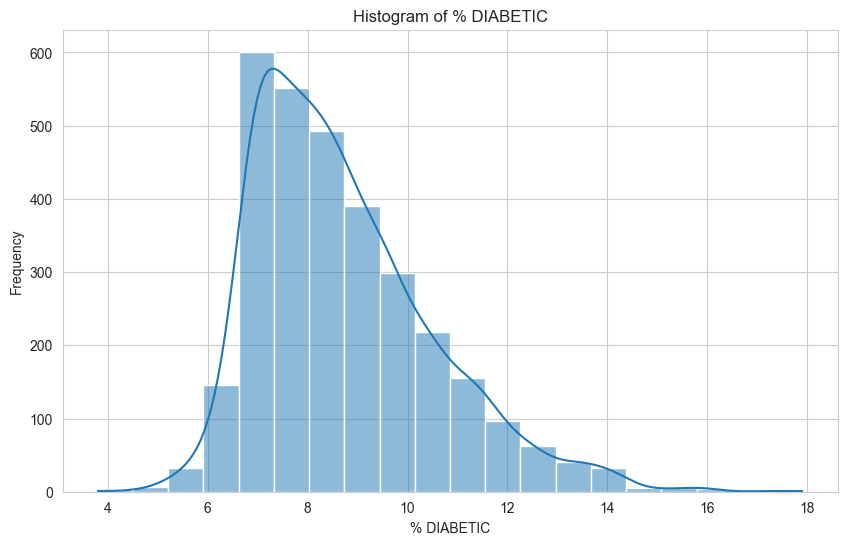

In [120]:
# Set style
sns.set_style("whitegrid")

# Plotting the histogram for '% DIABETIC' in the Diabetes dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=data_diab, x='% DIABETIC', bins=20, kde=True)
plt.title('Histogram of % DIABETIC')
plt.xlabel('% DIABETIC')
plt.ylabel('Frequency')
plt.show()



### Box Plot

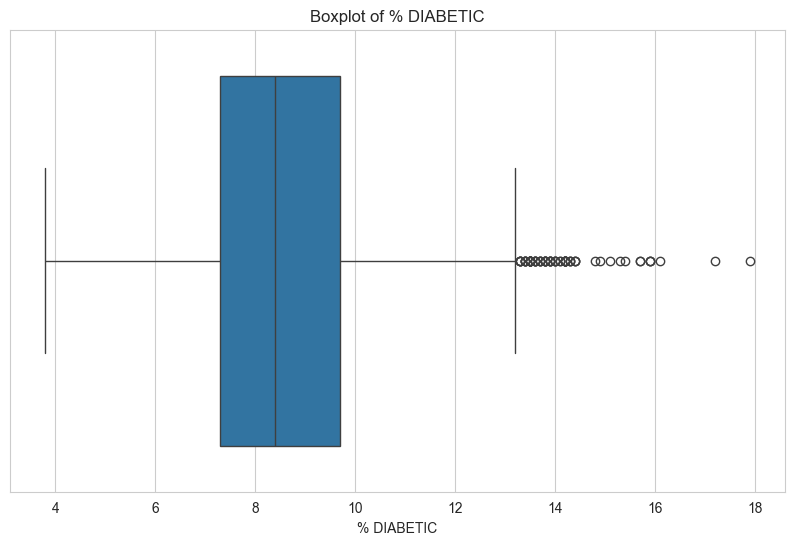

In [121]:
# Set style
sns.set_style("whitegrid")

# Create a boxplot for '% DIABETIC'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_diab['% DIABETIC'])
plt.title('Boxplot of % DIABETIC')
plt.xlabel('% DIABETIC')
plt.show()

## Bar chart

/var/folders/jw/v2yz53qj04jb04nsqn4c6cnm0000gn/T/ipykernel_40195/2393814497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_states, y=top_bottom_states.index, palette="viridis")


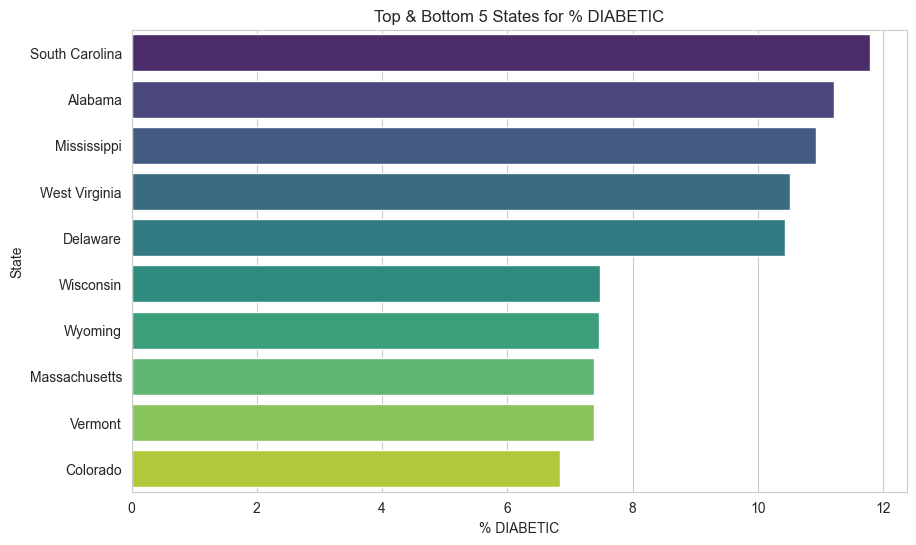

In [122]:
# Calculate average '% DIABETIC' per state
avg_diabetes_per_state = data_diab.groupby("STATE")['% DIABETIC'].mean().sort_values(ascending=False)

# Select top 5 and bottom 5 states
top_bottom_states = pd.concat([avg_diabetes_per_state.head(5), avg_diabetes_per_state.tail(5)])

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_states, y=top_bottom_states.index, palette="viridis")
plt.title('Top & Bottom 5 States for % DIABETIC')
plt.xlabel('% DIABETIC')
plt.ylabel('State')
plt.show()


## Box Plot % diabetic vs State- Outlier

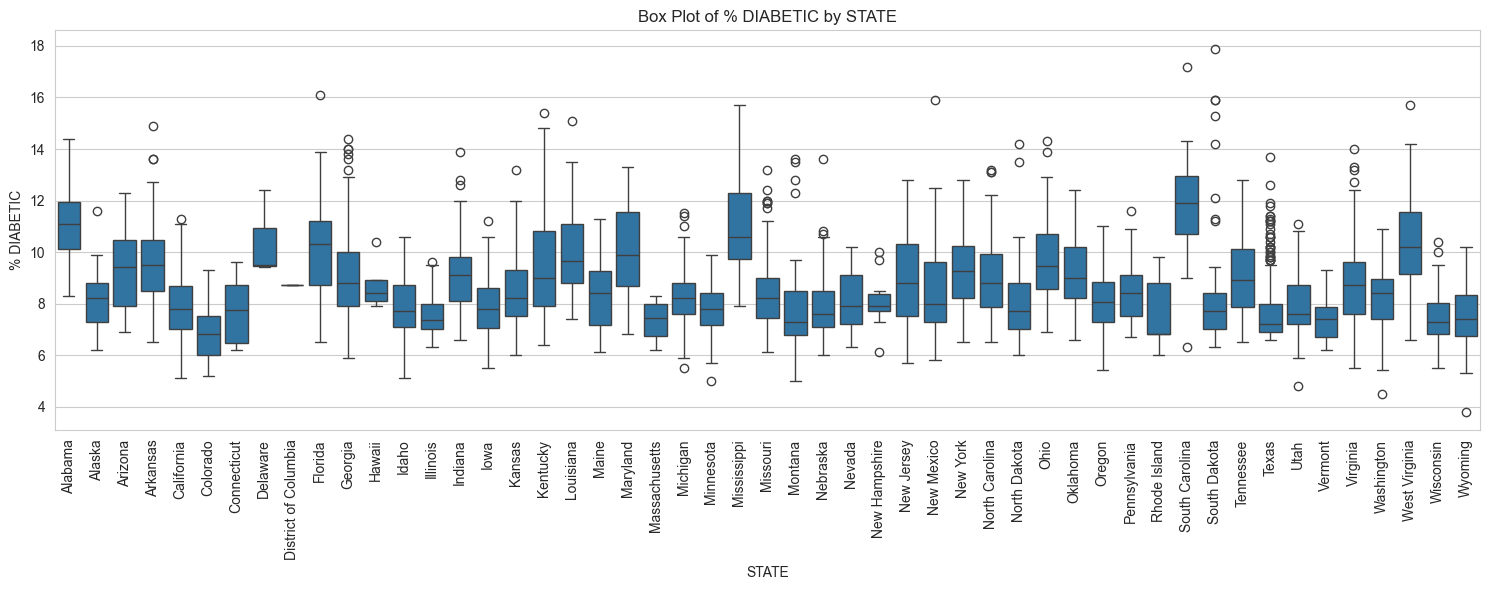

In [123]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data_diab['STATE'], y=data_diab['% DIABETIC'])
plt.xticks(rotation=90)
plt.title('Box Plot of % DIABETIC by STATE')
plt.xlabel('STATE')
plt.ylabel('% DIABETIC')
plt.tight_layout()
plt.show()

In [124]:
data_diab.COUNTY.unique()

array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'Uinta County', 'Washakie County', 'Weston County'], dtype=object)

In [125]:
data_diab.COUNTY.nunique()

1877

In [126]:
data_diab.STATE.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [127]:
data_diab.STATE.nunique()

51

In [128]:
data_diab['State_County'] = data_diab['STATE'] + '_' + data_diab['COUNTY']
print(data_diab)

      YEAR   FIPS             COUNTY    STATE  % DIABETIC  \
0     2018   1001     Autauga County  Alabama         9.5   
1     2018   1003     Baldwin County  Alabama         8.4   
2     2018   1005     Barbour County  Alabama        13.5   
3     2018   1007        Bibb County  Alabama        10.2   
4     2018   1009      Blount County  Alabama        10.5   
...    ...    ...                ...      ...         ...   
3137  2018  56037  Sweetwater County  Wyoming         7.8   
3138  2018  56039       Teton County  Wyoming         3.8   
3139  2018  56041       Uinta County  Wyoming         8.4   
3140  2018  56043    Washakie County  Wyoming         7.4   
3141  2018  56045      Weston County  Wyoming         7.6   

                   State_County  
0        Alabama_Autauga County  
1        Alabama_Baldwin County  
2        Alabama_Barbour County  
3           Alabama_Bibb County  
4         Alabama_Blount County  
...                         ...  
3137  Wyoming_Sweetwater Coun

# EDA on Inactivity  and Obesity Sheet

In [129]:
# Rows and Columns in the dataset
data_inact.shape
data_obes.shape
print(data_inact.shape, data_obes.shape)

(1370, 5) (363, 5)


In [130]:
data_inact.describe
data_obes.describe
print(data_obes.describe, data_inact.describe)

<bound method NDFrame.describe of      YEAR   FIPS                     COUNTY       STATE  % OBESE
0    2018   1011             Bullock County     Alabama     18.7
1    2018   2068             Denali Borough      Alaska     18.9
2    2018   2105  Hoonah-Angoon Census Area      Alaska     19.4
3    2018   2195     Petersburg Census Area      Alaska     17.2
4    2018   2230       Skagway Municipality      Alaska     18.3
..    ...    ...                        ...         ...      ...
358  2018  51820            Waynesboro City    Virginia     19.5
359  2018  51830          Williamsburg City    Virginia     18.0
360  2018  51840            Winchester City    Virginia     19.4
361  2018  53055            San Juan County  Washington     19.3
362  2018  56039               Teton County     Wyoming     10.5

[363 rows x 5 columns]> <bound method NDFrame.describe of       YEAR  FIPDS                  COUNTY    STATE  % INACTIVE
0     2018   1011          Bullock County  Alabama        17.0
1

In [131]:
# Columns of diabetes dataset
data_inact.columns
data_obes.columns
print(data_obes.columns, data_inact.columns)

Index(['YEAR', 'FIPS', 'COUNTY', 'STATE', '% OBESE'], dtype='object') Index(['YEAR', 'FIPDS', 'COUNTY', 'STATE', '% INACTIVE'], dtype='object')


In [132]:
# Printing first 10 rows 
data_inact.head(10)
data_obes.head(10)
print(data_inact.head(10),data_obes.head(10))

   YEAR  FIPDS                        COUNTY    STATE  % INACTIVE
0  2018   1011                Bullock County  Alabama        17.0
1  2018   1029               Cleburne County  Alabama        19.3
2  2018   1037                  Coosa County  Alabama        16.8
3  2018   1063                 Greene County  Alabama        16.8
4  2018   2013        Aleutians East Borough   Alaska        19.2
5  2018   2020        Anchorage Municipality   Alaska        17.1
6  2018   2068                Denali Borough   Alaska        16.2
7  2018   2090  Fairbanks North Star Borough   Alaska        18.6
8  2018   2100                Haines Borough   Alaska        15.8
9  2018   2105     Hoonah-Angoon Census Area   Alaska        15.0    YEAR  FIPS                     COUNTY       STATE  % OBESE
0  2018  1011             Bullock County     Alabama     18.7
1  2018  2068             Denali Borough      Alaska     18.9
2  2018  2105  Hoonah-Angoon Census Area      Alaska     19.4
3  2018  2195     Petersbu

In [133]:
# Basic Descriptive Statistics for Inactivity
inactivity_stats=data_inact['% INACTIVE'].describe()
inactivity_stats['variance'] = data_inact['% INACTIVE'].var()
inactivity_stats['skewness'] = data_inact['% INACTIVE'].skew()
inactivity_stats['kurtosis'] = data_inact['% INACTIVE'].kurt()
print(inactivity_stats)

count       1370.000000
mean          16.543358
std            1.926010
min            8.800000
25%           15.000000
50%           16.700000
75%           18.100000
max           19.500000
variance       3.709514
skewness      -0.342417
kurtosis      -0.546649
Name: % INACTIVE, dtype: float64


In [134]:
# Basic Descriptive Statistics for Obesity
obesity_stats=data_obes['% OBESE'].describe()
obesity_stats['variance'] = data_obes['% OBESE'].var()
obesity_stats['skewness'] = data_obes['% OBESE'].skew()
obesity_stats['kurtosis'] = data_obes['% OBESE'].kurt()
print(obesity_stats)

count       363.000000
mean         18.264738
std           1.038311
min          10.500000
25%          17.900000
50%          18.300000
75%          19.000000
max          19.500000
variance      1.078090
skewness     -2.696210
kurtosis     12.510652
Name: % OBESE, dtype: float64


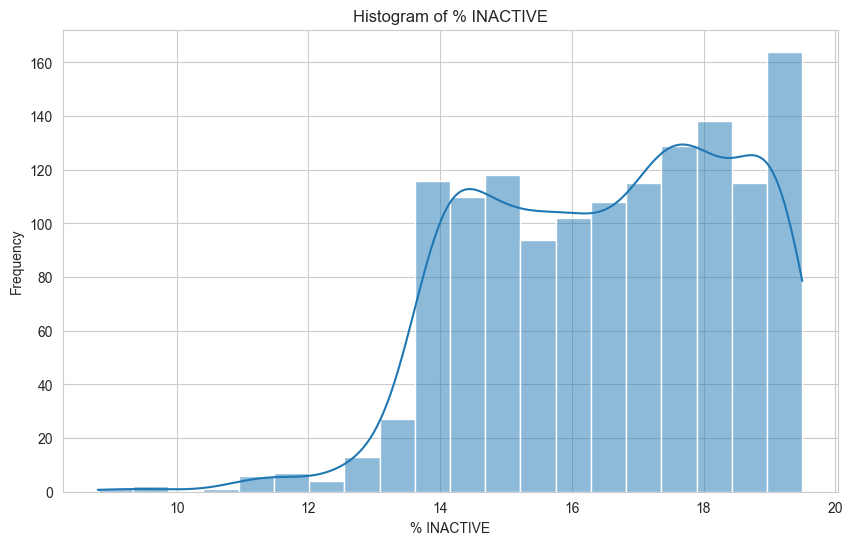

In [135]:
# Set style
sns.set_style("whitegrid")

# Plotting the histogram for '% Inactivity' in the Diabetes dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=data_inact, x='% INACTIVE', bins=20, kde=True)
plt.title('Histogram of % INACTIVE')
plt.xlabel('% INACTIVE')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Frequency')

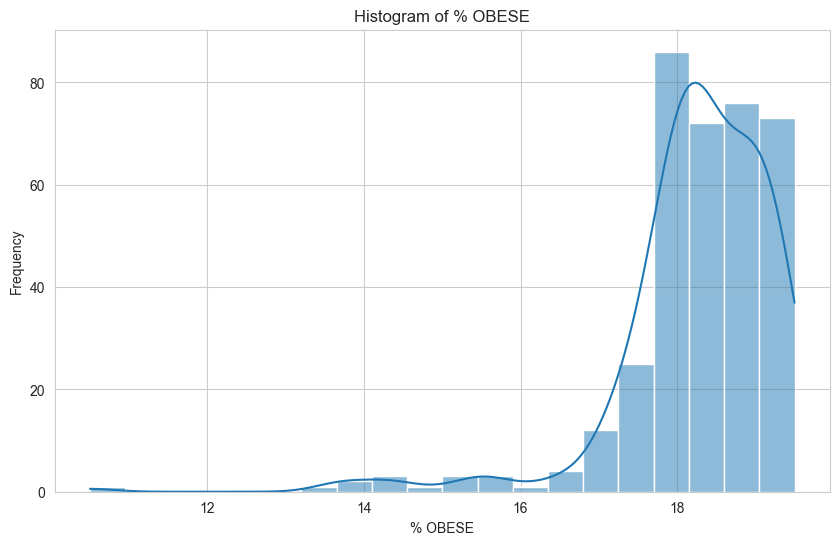

In [136]:
# Set style
sns.set_style("whitegrid")

# Plotting the histogram for '% Inactivity' in the Diabetes dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=data_obes, x='% OBESE', bins=20, kde=True)
plt.title('Histogram of % OBESE')
plt.xlabel('% OBESE')
plt.ylabel('Frequency')

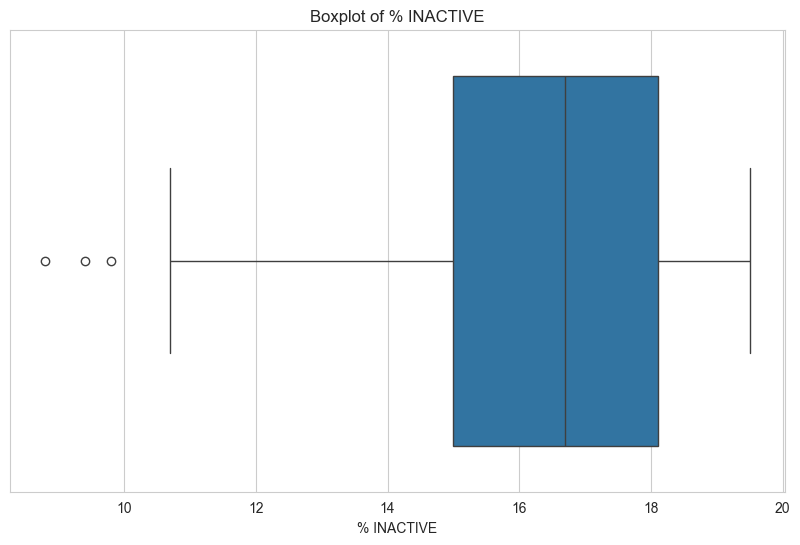

In [137]:
# Set style
sns.set_style("whitegrid")

# Create a boxplot for '% INACTIVITY'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_inact['% INACTIVE'])
plt.title('Boxplot of % INACTIVE')
plt.xlabel('% INACTIVE')
plt.show()

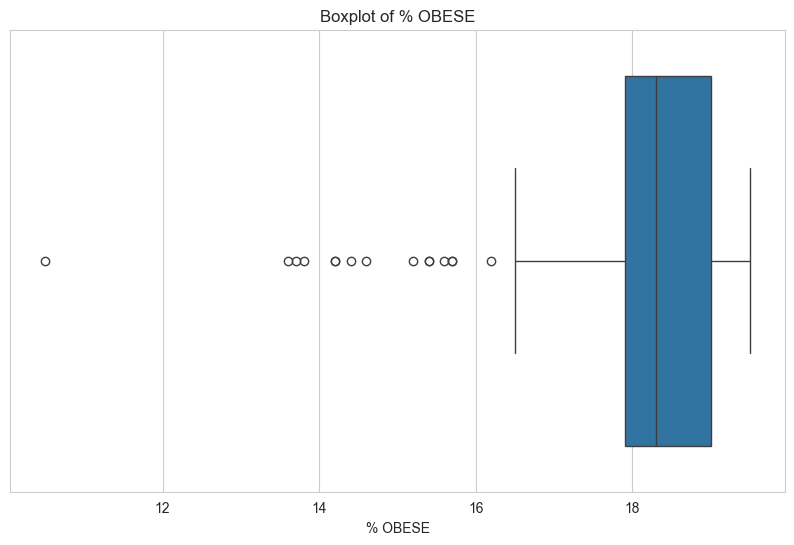

In [138]:
# Set style
sns.set_style("whitegrid")

# Create a boxplot for '% OBESE'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_obes['% OBESE'])
plt.title('Boxplot of % OBESE')
plt.xlabel('% OBESE')
plt.show()

/var/folders/jw/v2yz53qj04jb04nsqn4c6cnm0000gn/T/ipykernel_40195/2661474655.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_states, y=top_bottom_states.index, palette="viridis")


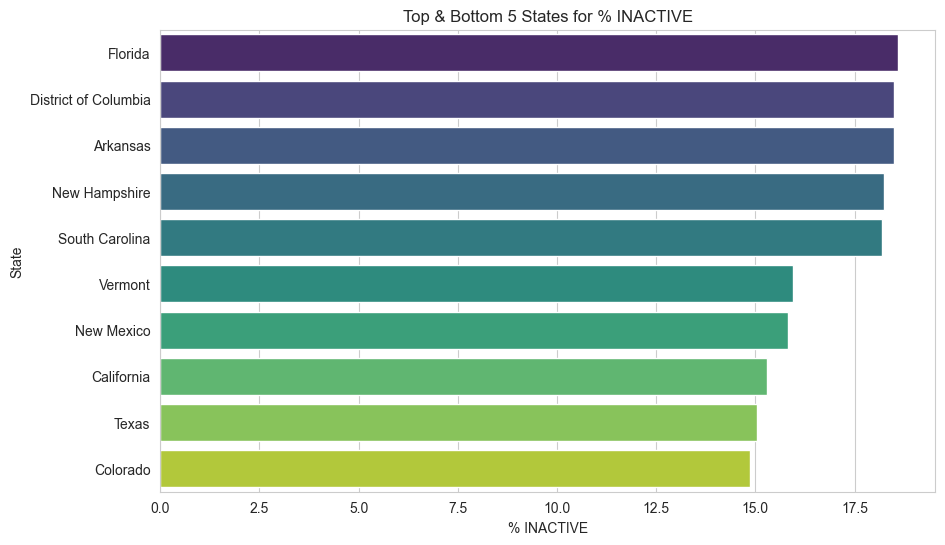

In [139]:
# Calculate average '% inactivity' per state
avg_inactivity_per_state = data_inact.groupby("STATE")['% INACTIVE'].mean().sort_values(ascending=False)

# Select top 5 and bottom 5 states
top_bottom_states = pd.concat([avg_inactivity_per_state.head(5), avg_inactivity_per_state.tail(5)])

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_states, y=top_bottom_states.index, palette="viridis")
plt.title('Top & Bottom 5 States for % INACTIVE')
plt.xlabel('% INACTIVE')
plt.ylabel('State')
plt.show()


/var/folders/jw/v2yz53qj04jb04nsqn4c6cnm0000gn/T/ipykernel_40195/421690771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_states, y=top_bottom_states.index, palette="viridis")


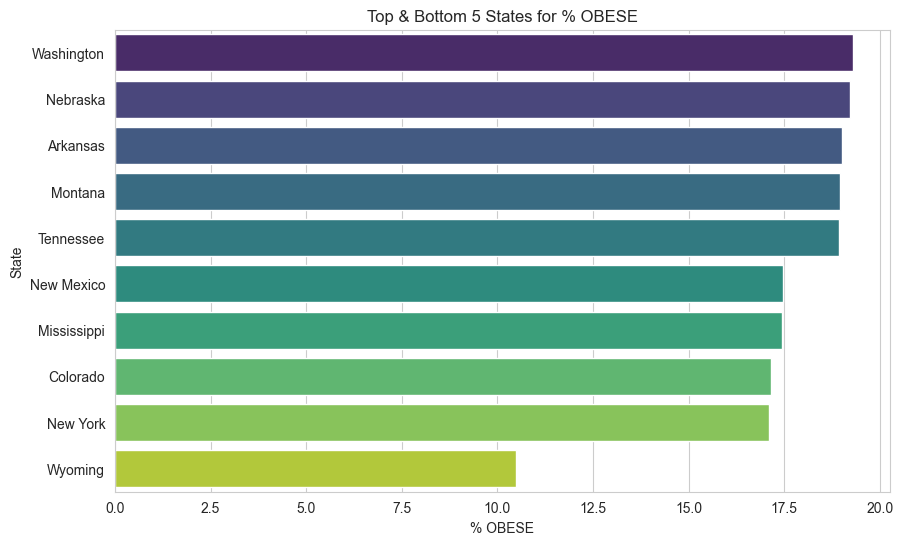

In [140]:
# Calculate average '% OBESITY' per state
avg_obesity_per_state = data_obes.groupby("STATE")['% OBESE'].mean().sort_values(ascending=False)

# Select top 5 and bottom 5 states
top_bottom_states = pd.concat([avg_obesity_per_state.head(5), avg_obesity_per_state.tail(5)])

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_states, y=top_bottom_states.index, palette="viridis")
plt.title('Top & Bottom 5 States for % OBESE')
plt.xlabel('% OBESE')
plt.ylabel('State')
plt.show()

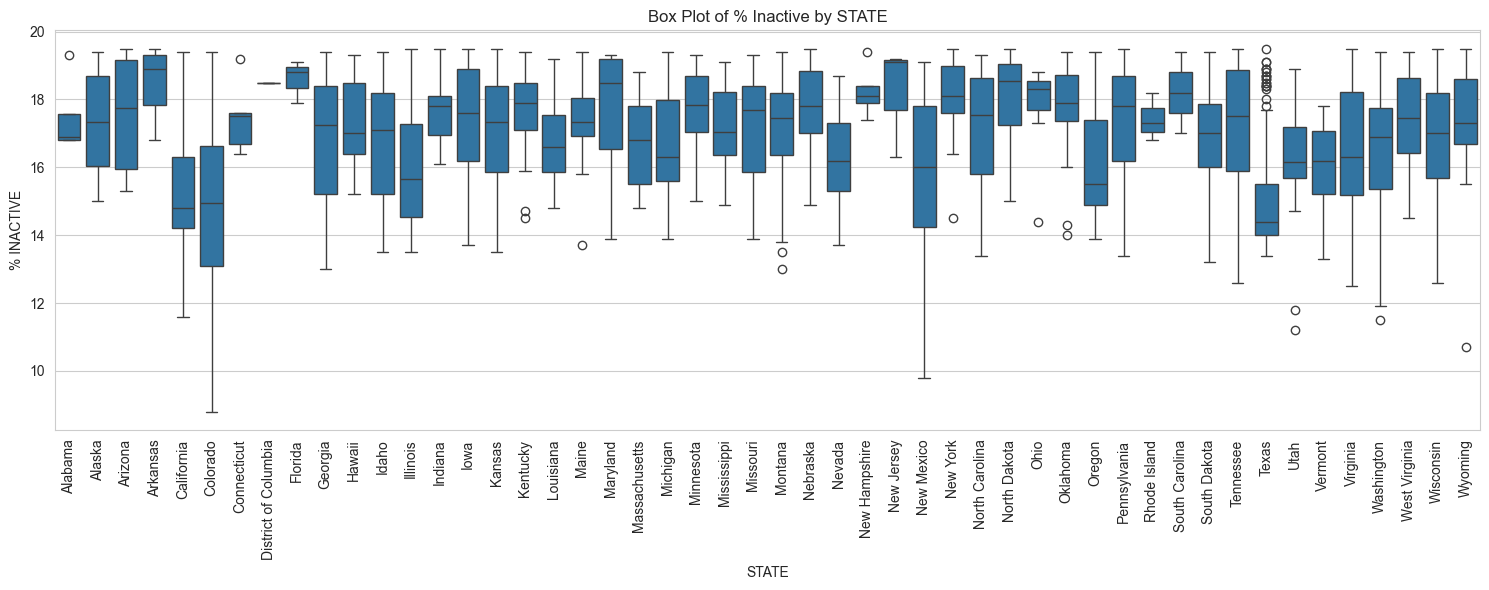

In [141]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data_inact['STATE'], y=data_inact['% INACTIVE'])
plt.xticks(rotation=90)
plt.title('Box Plot of % Inactive by STATE')
plt.xlabel('STATE')
plt.ylabel('% INACTIVE')
plt.tight_layout()
plt.show()

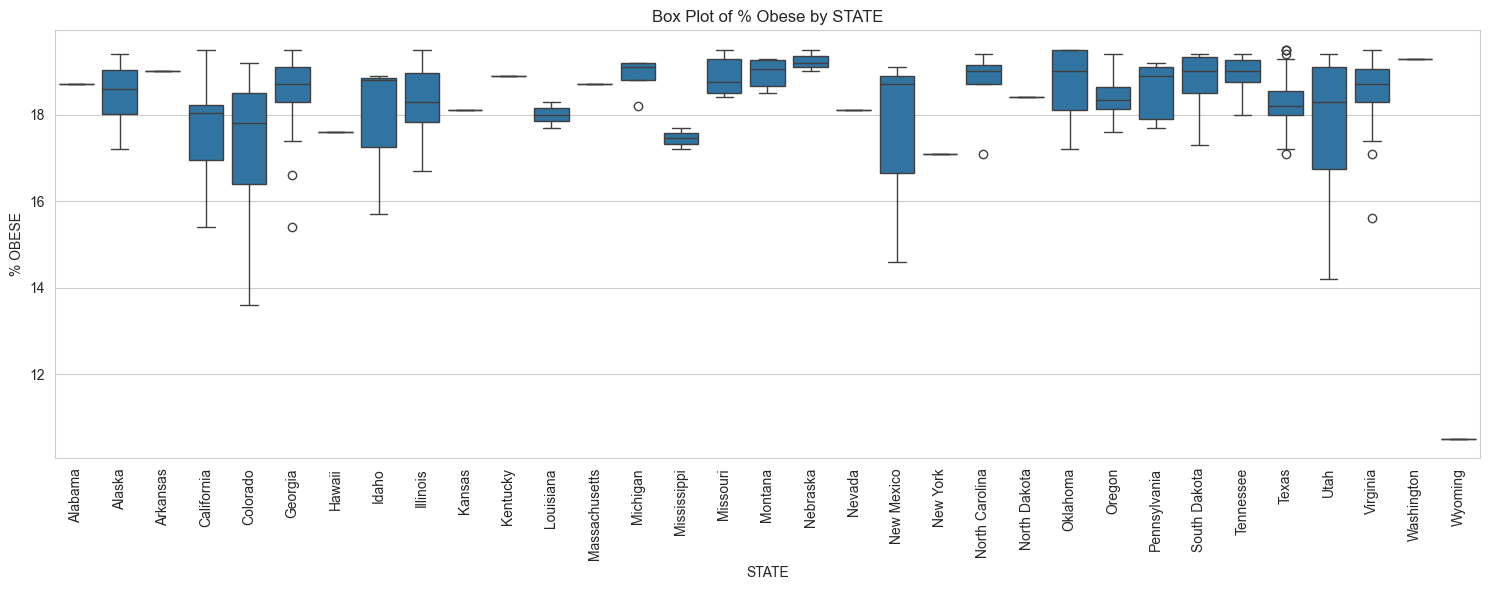

In [142]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data_obes['STATE'], y=data_obes['% OBESE'])
plt.xticks(rotation=90)
plt.title('Box Plot of % Obese by STATE')
plt.xlabel('STATE')
plt.ylabel('% OBESE')
plt.tight_layout()
plt.show()

In [143]:
data_inact.COUNTY.unique()
data_obes.COUNTY.unique()
print(data_inact.COUNTY.unique(), data_obes.COUNTY.unique())

['Bullock County' 'Cleburne County' 'Coosa County' ... 'Niobrara County'
 'Platte County' 'Sublette County'] ['Bullock County' 'Denali Borough' 'Hoonah-Angoon Census Area'
 'Petersburg Census Area' 'Skagway Municipality' 'Montgomery County'
 'Alpine County' 'Inyo County' 'Lassen County' 'Marin County'
 'Mariposa County' 'Mono County' 'Nevada County' 'Placer County'
 'Plumas County' 'San Francisco County' 'Santa Cruz County'
 'Sierra County' 'Boulder County' 'Broomfield County' 'Chaffee County'
 'Clear Creek County' 'Costilla County' 'Custer County' 'Dolores County'
 'Douglas County' 'Eagle County' 'Gilpin County' 'Grand County'
 'Gunnison County' 'Hinsdale County' 'Jackson County' 'Kiowa County'
 'La Plata County' 'Lake County' 'Mineral County' 'Montrose County'
 'Ouray County' 'Pitkin County' 'Rio Blanco County' 'Routt County'
 'San Juan County' 'San Miguel County' 'Sedgwick County' 'Summit County'
 'Bacon County' 'Baker County' 'Butts County' 'Calhoun County'
 'Chattahoochee County' 

In [144]:
data_inact.COUNTY.nunique()
data_obes.COUNTY.nunique()
print(data_inact.COUNTY.nunique(),"&",data_obes.COUNTY.nunique())

1023 & 334


In [145]:
data_inact.STATE.unique()
data_obes.STATE.unique()
print(data_inact.STATE.unique(), data_obes.STATE.unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming'] ['Alabama' 'Alaska' 'Arkansas' 'California' 'Colorado' 'Georgia' 'Hawaii'
 'Idaho' 'Illinois' 'Kansas' 'Kentucky' 'Louisiana' 'Massachusetts'
 'Michigan' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Virginia' 'Washington' 'Wyoming']


In [146]:
data_inact.STATE.nunique()
data_obes.STATE.nunique()
print(data_inact.STATE.nunique(),"&",data_obes.STATE.nunique())

50 & 33


In [147]:
data_inact['State_County'] = data_inact['STATE'] + '_' + data_inact['COUNTY']
print(data_inact)
data_obes['State_County'] = data_obes['STATE'] + '_' + data_obes['COUNTY']
print(data_obes)

      YEAR  FIPDS                  COUNTY    STATE  % INACTIVE  \
0     2018   1011          Bullock County  Alabama        17.0   
1     2018   1029         Cleburne County  Alabama        19.3   
2     2018   1037            Coosa County  Alabama        16.8   
3     2018   1063           Greene County  Alabama        16.8   
4     2018   2013  Aleutians East Borough   Alaska        19.2   
...    ...    ...                     ...      ...         ...   
1365  2018  56027         Niobrara County  Wyoming        17.3   
1366  2018  56031           Platte County  Wyoming        18.5   
1367  2018  56033         Sheridan County  Wyoming        19.5   
1368  2018  56035         Sublette County  Wyoming        16.7   
1369  2018  56039            Teton County  Wyoming        10.7   

                       State_County  
0            Alabama_Bullock County  
1           Alabama_Cleburne County  
2              Alabama_Coosa County  
3             Alabama_Greene County  
4     Alaska_Aleu

In [148]:
# Specify the output path
output_path = "./csv files-after eda/"

# Specify file names
file_names = ['diabetes.csv', 'inactivity.csv', 'obesity.csv']

# Save each DataFrame to a separate CSV file
data_diab.to_csv(output_path + file_names[0], index=False)
data_inact.to_csv(output_path + file_names[1], index=False)
data_obes.to_csv(output_path + file_names[2], index=False)

# Verify the files have been saved by checking the file names in the output directory
import os
os.listdir(output_path)

['inactivity.csv', 'diabetes.csv', 'obesity.csv']

## Linear Regression

### Inner join

In [149]:
obesity_df = pd.read_csv('./csv files-after eda/obesity.csv')
inactivity_df = pd.read_csv('./csv files-after eda/inactivity.csv')
merge1_df = pd.merge(obesity_df, inactivity_df, on='State_County', how='inner')
merge1_df.head()

,YEAR_x,FIPS,COUNTY_x,STATE_x,% OBESE,State_County,YEAR_y,FIPDS,COUNTY_y,STATE_y,% INACTIVE
0,2018,1011,Bullock County,Alabama,18.7,Alabama_Bullock County,2018,1011,Bullock County,Alabama,17.0
1,2018,2068,Denali Borough,Alaska,18.9,Alaska_Denali Borough,2018,2068,Denali Borough,Alaska,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,Alaska_Hoonah-Angoon Census Area,2018,2105,Hoonah-Angoon Census Area,Alaska,15.0
3,2018,2195,Petersburg Census Area,Alaska,17.2,Alaska_Petersburg Census Area,2018,2195,Petersburg Census Area,Alaska,17.8
4,2018,2230,Skagway Municipality,Alaska,18.3,Alaska_Skagway Municipality,2018,2230,Skagway Municipality,Alaska,15.8


In [150]:
# Rename the columns to include 'obesity' and 'inactivity' instead of '_x' and '_y'
renamed_merge1_df = merge1_df.rename(columns={
    'YEAR_x': 'YEAR_obesity',
    'FIPS': 'FIPS_obesity',
    'COUNTY_x': 'COUNTY_obesity',
    'STATE_x': 'STATE_obesity',
    '% OBESE': '% OBESE',
    'YEAR_y': 'YEAR_inactivity',
    'FIPDS': 'FIPS_inactivity',
    'COUNTY_y': 'COUNTY_inactivity',
    'STATE_y': 'STATE_inactivity',
    '% INACTIVE': '% INACTIVE'
})

# Show the first few rows of the renamed dataframe
renamed_merge1_df.head()


,YEAR_obesity,FIPS_obesity,COUNTY_obesity,STATE_obesity,% OBESE,State_County,YEAR_inactivity,FIPS_inactivity,COUNTY_inactivity,STATE_inactivity,% INACTIVE
0,2018,1011,Bullock County,Alabama,18.7,Alabama_Bullock County,2018,1011,Bullock County,Alabama,17.0
1,2018,2068,Denali Borough,Alaska,18.9,Alaska_Denali Borough,2018,2068,Denali Borough,Alaska,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,Alaska_Hoonah-Angoon Census Area,2018,2105,Hoonah-Angoon Census Area,Alaska,15.0
3,2018,2195,Petersburg Census Area,Alaska,17.2,Alaska_Petersburg Census Area,2018,2195,Petersburg Census Area,Alaska,17.8
4,2018,2230,Skagway Municipality,Alaska,18.3,Alaska_Skagway Municipality,2018,2230,Skagway Municipality,Alaska,15.8


In [151]:
csv_file_path = './merged files/merged_obesity_inactivity.csv'
renamed_merge1_df.to_csv(csv_file_path, index=False)

csv_file_path

'./merged files/merged_obesity_inactivity.csv'

### Merging Inactivity,obesity csv and diabetes on the basis of "STATE_COUNTY" column-inner join

In [152]:
obesinact_df = pd.read_csv('./merged files/merged_obesity_inactivity.csv')
diabetes_df = pd.read_csv('./csv files-after eda/diabetes.csv')
merge2_df = pd.merge(obesinact_df, diabetes_df , on='State_County', how='inner')
merge2_df.head()

,YEAR_obesity,FIPS_obesity,COUNTY_obesity,STATE_obesity,% OBESE,State_County,YEAR_inactivity,FIPS_inactivity,COUNTY_inactivity,STATE_inactivity,% INACTIVE,YEAR,FIPS,COUNTY,STATE,% DIABETIC
0,2018,1011,Bullock County,Alabama,18.7,Alabama_Bullock County,2018,1011,Bullock County,Alabama,17.0,2018,1011,Bullock County,Alabama,9.4
1,2018,2068,Denali Borough,Alaska,18.9,Alaska_Denali Borough,2018,2068,Denali Borough,Alaska,16.2,2018,2068,Denali Borough,Alaska,6.8
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,Alaska_Hoonah-Angoon Census Area,2018,2105,Hoonah-Angoon Census Area,Alaska,15.0,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3
3,2018,2195,Petersburg Census Area,Alaska,17.2,Alaska_Petersburg Census Area,2018,2195,Petersburg Census Area,Alaska,17.8,2018,2195,Petersburg Census Area,Alaska,9.2
4,2018,2230,Skagway Municipality,Alaska,18.3,Alaska_Skagway Municipality,2018,2230,Skagway Municipality,Alaska,15.8,2018,2230,Skagway Municipality,Alaska,6.6


In [153]:
columns_to_remove = [
    'YEAR_obesity', 'FIPS_obesity', 'COUNTY_obesity', 'STATE_obesity',
    'YEAR_inactivity', 'FIPS_inactivity', 'COUNTY_inactivity', 'STATE_inactivity',
    'YEAR', 'FIPS', 'COUNTY', 'STATE'
]
final_df = merge2_df.drop(columns=columns_to_remove, errors='ignore')

# Show the first few rows of the cleaned dataframe
final_df.head()

,% OBESE,State_County,% INACTIVE,% DIABETIC
0,18.7,Alabama_Bullock County,17.0,9.4
1,18.9,Alaska_Denali Borough,16.2,6.8
2,19.4,Alaska_Hoonah-Angoon Census Area,15.0,7.3
3,17.2,Alaska_Petersburg Census Area,17.8,9.2
4,18.3,Alaska_Skagway Municipality,15.8,6.6


### Saving the Dataframe in csv

In [154]:
csv_file_path = './merged files/final_sheet.csv'
final_df.to_csv(csv_file_path, index=False)

csv_file_path

'./merged files/final_sheet.csv'

## Corelation

In [170]:
# Calculate the correlation matrix
correlation_matrix = final_df[['% DIABETIC', '% OBESE', '% INACTIVE']].corr()

# Extract the correlation of '% DIABETIC' with '% OBESE' and '% INACTIVE'
correlation_diabetic_obese = correlation_matrix.loc['% DIABETIC', '% OBESE']
correlation_diabetic_inactive = correlation_matrix.loc['% DIABETIC', '% INACTIVE']

correlation_diabetic_obese, correlation_diabetic_inactive, correlation_matrix


(0.38994103875812935,
 0.5671037350564135,
             % DIABETIC   % OBESE  % INACTIVE
 % DIABETIC    1.000000  0.389941    0.567104
 % OBESE       0.389941  1.000000    0.472656
 % INACTIVE    0.567104  0.472656    1.000000)

## Training the Data for ML Model

In [155]:
final_df=pd.read_csv('./merged files/final_sheet.csv')
final_df.head()

,% OBESE,State_County,% INACTIVE,% DIABETIC
0,18.7,Alabama_Bullock County,17.0,9.4
1,18.9,Alaska_Denali Borough,16.2,6.8
2,19.4,Alaska_Hoonah-Angoon Census Area,15.0,7.3
3,17.2,Alaska_Petersburg Census Area,17.8,9.2
4,18.3,Alaska_Skagway Municipality,15.8,6.6


In [156]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [158]:
# Separate the dependent and independent variables
X = final_df[['% INACTIVE', '% OBESE']]
y = final_df['% DIABETIC']
X.head(), y.head()

(   % INACTIVE  % OBESE
 0        17.0     18.7
 1        16.2     18.9
 2        15.0     19.4
 3        17.8     17.2
 4        15.8     18.3,
 0    9.4
 1    6.8
 2    7.3
 3    9.2
 4    6.6
 Name: % DIABETIC, dtype: float64)

#### The independent variables x include "% INACTIVE" and "% OBESE", while the dependent variable y is "% DIABETIC".

In [159]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((283, 2), (71, 2), (283,), (71,))

#### 283 samples in the training set and 71 samples in the testing set, with each sample having 2 features ("% INACTIVE" and "% OBESE")

In [160]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

mse, r2, coefficients, intercept

(0.40006315354054606,
 0.3946987907298565,
 array([0.19406655, 0.1429442 ]),
 1.6154740957564178)

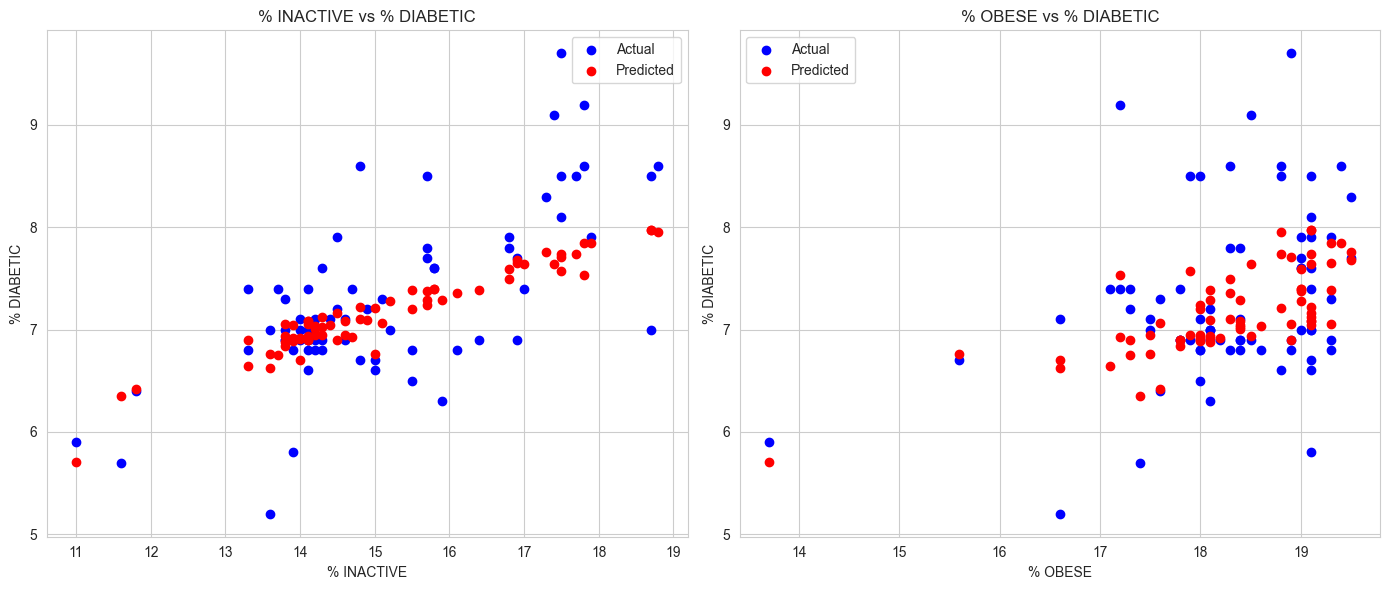

In [161]:
# Visualization of the results
# we have two independent variables, we'll visualize each one separately against the dependent variable

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for % INACTIVE vs % DIABETIC
axs[0].scatter(X_test['% INACTIVE'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['% INACTIVE'], y_pred, color='red', label='Predicted')
axs[0].set_title('% INACTIVE vs % DIABETIC')
axs[0].set_xlabel('% INACTIVE')
axs[0].set_ylabel('% DIABETIC')
axs[0].legend()

# Plot for % OBESE vs % DIABETIC
axs[1].scatter(X_test['% OBESE'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['% OBESE'], y_pred, color='red', label='Predicted')
axs[1].set_title('% OBESE vs % DIABETIC')
axs[1].set_xlabel('% OBESE')
axs[1].set_ylabel('% DIABETIC')
axs[1].legend()

plt.tight_layout()
plt.show()


## Residual Analysis

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/var/folders/jw/v2yz53qj04jb04nsqn4c6cnm0000gn/T/ipykernel_40195/3868033740.py:31: SyntaxWarning: invalid escape sequence '\s'
  axs[1, 1].set_ylabel('$\sqrt{|Residuals|}$')


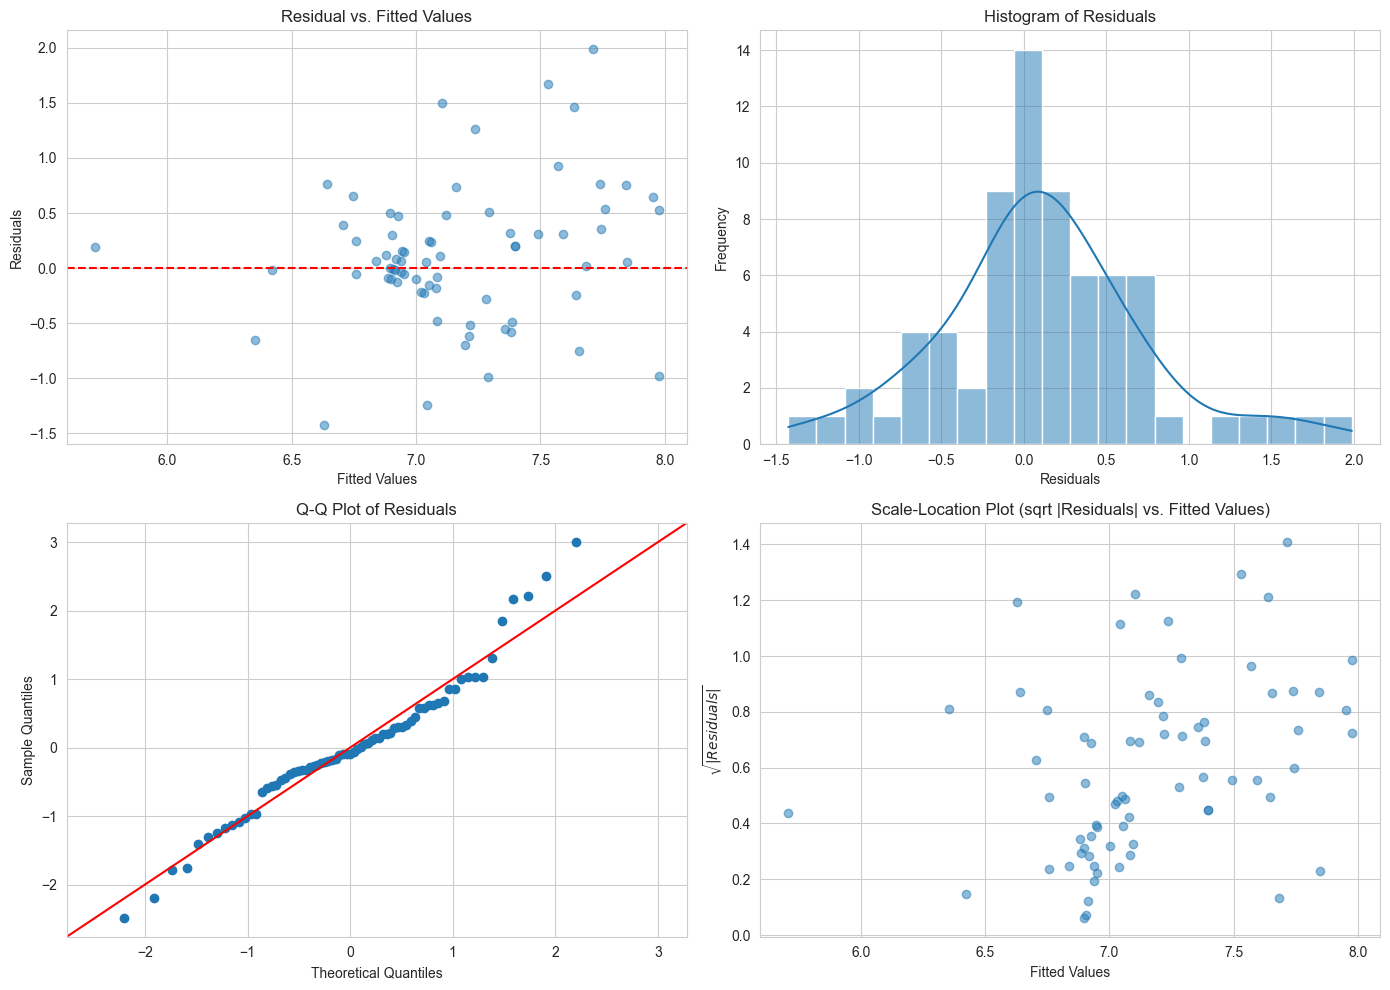

In [162]:
import statsmodels.api as sm
import scipy.stats as stats

# Calculating residuals
residuals = y_test - y_pred

# Creating plots for residual analysis
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Residual vs Fitted values plot
axs[0, 0].scatter(y_pred, residuals, alpha=0.5)
axs[0, 0].axhline(y=0, color='r', linestyle='--')
axs[0, 0].set_title('Residual vs. Fitted Values')
axs[0, 0].set_xlabel('Fitted Values')
axs[0, 0].set_ylabel('Residuals')

# Histogram of residuals
sns.histplot(residuals, bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Histogram of Residuals')
axs[0, 1].set_xlabel('Residuals')
axs[0, 1].set_ylabel('Frequency')

# Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True, ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot of Residuals')

# Scale-Location plot
axs[1, 1].scatter(y_pred, np.sqrt(np.abs(residuals)), alpha=0.5)
axs[1, 1].set_title('Scale-Location Plot (sqrt |Residuals| vs. Fitted Values)')
axs[1, 1].set_xlabel('Fitted Values')
axs[1, 1].set_ylabel('$\sqrt{|Residuals|}$')

plt.tight_layout()
plt.show()


In [163]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [164]:
# Statistical Tests
# 1. Normality of residuals
jb_stat, jb_p_value = stats.jarque_bera(residuals)

# 2. Homoscedasticity - Adding a constant term for the Breusch-Pagan test
X_test_with_const = sm.add_constant(X_test)
bp_stat, bp_p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, X_test_with_const)

# 3. Autocorrelation (Durbin-Watson statistic: values of 2 indicate no autocorrelation)
dw_stat = sm.stats.durbin_watson(residuals)

(jb_stat, jb_p_value, bp_stat, bp_p_value, dw_stat)

(4.925657484934849,
 0.08519361898725189,
 9.613324205411937,
 0.008175101856988607,
 1.739848526064965)

## WLS vs OLS

In [165]:
import statsmodels.api as sm

# Prepare the data
X = final_df[['% INACTIVE', '% OBESE']]
y = final_df['% DIABETIC']

# Add a constant to the predictor variables matrix
X = sm.add_constant(X)

# Step 1: Fit an OLS model
ols_model = sm.OLS(y, X).fit()

# Step 2: Calculate residuals
residuals = ols_model.resid

# Step 3: Calculate weights as the inverse of the absolute residuals
weights = 1 / abs(residuals)

# Step 4: Fit a WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Display the summary of both models
ols_summary = ols_model.summary()
wls_summary = wls_model.summary()

ols_summary, wls_summary


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             % DIABETIC   R-squared:                       0.341
 Model:                            OLS   Adj. R-squared:                  0.337
 Method:                 Least Squares   F-statistic:                     90.71
 Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.76e-32
 Time:                        12:27:46   Log-Likelihood:                -315.89
 No. Observations:                 354   AIC:                             637.8
 Df Residuals:                     351   BIC:                             649.4
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [166]:
wls_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             % DIABETIC   R-squared:                       0.737
Model:                            WLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     492.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.35e-102
Time:                        12:27:46   Log-Likelihood:                -61.826
No. Observations:                 354   AIC:                             129.7
Df Residuals:                     351   BIC:                             141.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8309      0.192      9.544      0.000       1.454       2.208
% INACTIVE     0.2298      0.012     19.959      0.000       0.207       0.252
% OBESE        0.1033      0.013      8.042      0.000       0.078       0.129
==============================================================================
Omnibus:                       31.404   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.412
Skew:                           0.043   Prob(JB):                      0.00548
Kurtosis:                       2.164   Cond. No.                         503.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### K Fold

In [167]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# ... [Load data and define X, y, and weights here] ...

# Perform k-fold CV for k=5 and k=10
def perform_kfold_cv(k, X, y, weights):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    mse_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = sm.WLS(y_train, X_train, weights=weights.iloc[train_index]).fit()
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mse_list.append(mse)
    return mse_list

mse_k5 = perform_kfold_cv(5, X, y, weights)
mse_k10 = perform_kfold_cv(10, X, y, weights)

# Function to calculate RMSE and R2 for each fold
def calculate_rmse_r2(mse_list, k, X, y, weights):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    rmse_list = np.sqrt(mse_list)
    r2_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = sm.WLS(y_train, X_train, weights=weights.iloc[train_index]).fit()
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_list.append(r2)
    return rmse_list, r2_list

# Calculating RMSE and R2 for k=5 and k=10
rmse_k5, r2_k5 = calculate_rmse_r2(mse_k5, 5, X, y, weights)
rmse_k10, r2_k10 = calculate_rmse_r2(mse_k10, 10, X, y, weights)

# Calculating average RMSE and R2 for k=5 and k=10
avg_rmse_k5, avg_rmse_k10 = np.mean(rmse_k5), np.mean(rmse_k10)
avg_r2_k5, avg_r2_k10 = np.mean(r2_k5), np.mean(r2_k10)

avg_rmse_k5, avg_r2_k5, avg_rmse_k10, avg_r2_k10, rmse_k5, r2_k5, rmse_k10, r2_k10


(0.5882357352380638,
 0.32297976782880156,
 0.5853731007694261,
 0.27571241919572803,
 array([0.59050576, 0.60822468, 0.698881  , 0.55035273, 0.4932145 ]),
 [0.3798004844696584,
  0.3135541400958559,
  0.30739049729298906,
  0.15126401360837405,
  0.4628897036771301],
 array([0.59821298, 0.63458721, 0.70848952, 0.44757601, 0.64132419,
        0.7310366 , 0.59288368, 0.51222425, 0.49056873, 0.49682784]),
 [-0.04543193561939396,
  0.5244859972866616,
  0.26061920525393456,
  0.2825791149077377,
  0.35385442741231454,
  0.31018947647322637,
  -0.21248254185931414,
  0.37980904276666494,
  0.5167912544227077,
  0.38671015091274075])

In [168]:
print(avg_rmse_k5, avg_r2_k5, avg_rmse_k10, avg_r2_k10)

0.5882357352380638 0.32297976782880156 0.5853731007694261 0.27571241919572803


## Polynomial Degree

In [169]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Function to create polynomial regression model
def polynomial_regression(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Predictor and response variables
X_poly = final_df[['% INACTIVE', '% OBESE']]
y_poly = final_df['% DIABETIC']

# Define the degrees for the polynomial
degrees = [1, 2, 3, 4]

# Store the average RMSE and R2 for each polynomial degree
avg_rmse_per_degree = []
avg_r2_per_degree = []

# Perform 10-fold CV for polynomial regression of degrees 1 through 4
for degree in degrees:
    model = polynomial_regression(degree)
    mse_scores = -cross_val_score(model, X_poly, y_poly, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y_poly, cv=5, scoring='r2')
    
    avg_rmse_per_degree.append(np.mean(np.sqrt(mse_scores)))
    avg_r2_per_degree.append(np.mean(r2_scores))

# Results
list(zip(degrees, avg_rmse_per_degree, avg_r2_per_degree))



[(1, 0.5830814784052398, 0.15480999642745846),
 (2, 0.5708151968001751, 0.18169056467242567),
 (3, 0.7503669432319742, -0.4264743403306305),
 (4, 1.265691563257321, -3.5696038733466553)]